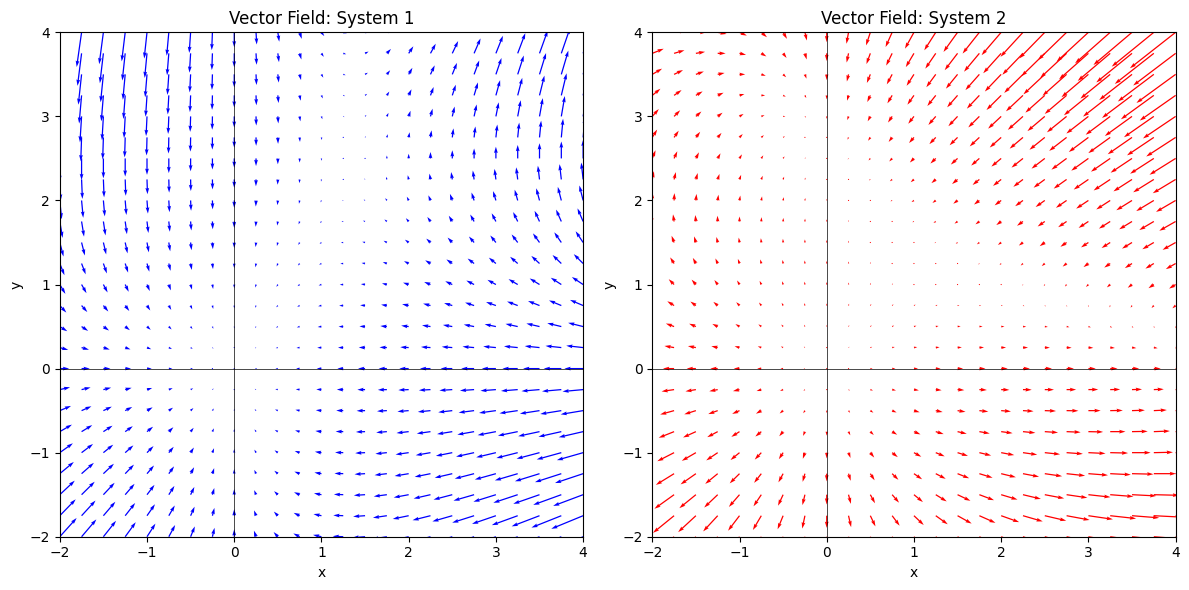

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of (x, y) points
x_vals = np.linspace(-2, 4, 25)
y_vals = np.linspace(-2, 4, 25)
X, Y = np.meshgrid(x_vals, y_vals)

# ---- System 1 ----
# dx/dt = -5x + 2xy
# dy/dt = -4y + 3xy
U1 = -5 * X + 2 * X * Y   # dx/dt
V1 = -4 * Y + 3 * X * Y   # dy/dt

# ---- System 2 ----
# dx/dt = 6x - x^2 - 4xy
# dy/dt = 5y - 2xy - 2y^2
U2 = 6 * X - X**2 - 4 * X * Y
V2 = 5 * Y - 2 * X * Y - 2 * Y**2

# ---- Plotting ----
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot system 1
axes[0].quiver(X, Y, U1, V1, color='blue')
axes[0].set_title("Vector Field: System 1")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_xlim([-2, 4])
axes[0].set_ylim([-2, 4])
axes[0].axhline(0, color='black', lw=0.5)
axes[0].axvline(0, color='black', lw=0.5)

# Plot system 2
axes[1].quiver(X, Y, U2, V2, color='red')
axes[1].set_title("Vector Field: System 2")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_xlim([-2, 4])
axes[1].set_ylim([-2, 4])
axes[1].axhline(0, color='black', lw=0.5)
axes[1].axvline(0, color='black', lw=0.5)

plt.tight_layout()
plt.show()

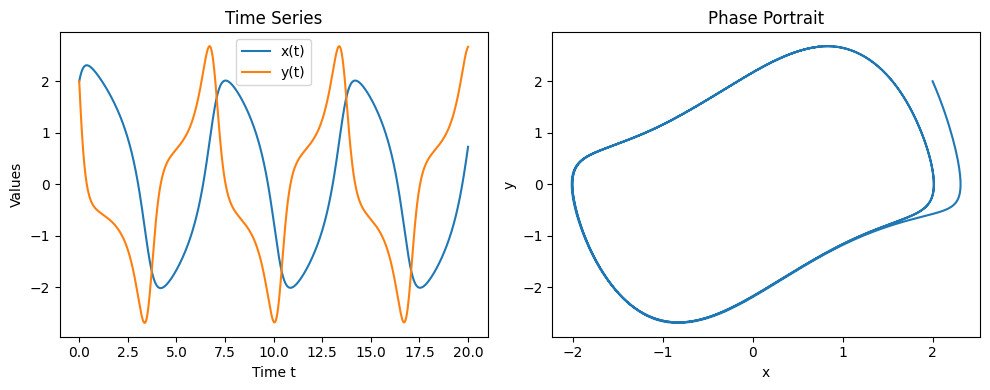

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of ODEs
def van_der_pol(t, state):
    x, y = state
    dxdt = y
    dydt = -x + (1 - x**2) * y
    return [dxdt, dydt]

# Initial condition (x0, y0)
x0, y0 = 2, 2
initial_state = [x0, y0]

# Time span for the simulation
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system
solution = solve_ivp(van_der_pol, t_span, initial_state, t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 4))

# x(t) and y(t)
plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[0], label='x(t)')
plt.plot(solution.t, solution.y[1], label='y(t)')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.legend()
plt.title('Time Series')

# Phase portrait (y vs x)
plt.subplot(1, 2, 2)
plt.plot(solution.y[0], solution.y[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()
